In [5]:
#Importing all the libraries
import datetime
import json
import string
import os
import gzip

import numpy as np
import pandas as pd

import seaborn as sns
import community.community_louvain as community_louvain
import random



# For plotting
import matplotlib.pyplot as plt

# Network analysis
import networkx as nx

import nltk

In [6]:
#Load dataset for 12 months of 2020,2021,2022
all_file_paths = []


all_file_paths.append(['/content/data.2020-01.jsonl.gz', '/content/data.2020-02.jsonl.gz', '/content/data.2020-03.jsonl.gz', '/content/data.2020-04.jsonl.gz', '/content/data.2020-05.jsonl.gz', '/content/data.2020-06.jsonl.gz', '/content/data.2020-07.jsonl.gz', '/content/data.2020-08.jsonl.gz', '/content/data.2020-09.jsonl.gz', '/content/data.2020-10.jsonl.gz', '/content/data.2020-11.jsonl.gz', '/content/data.2020-12.jsonl.gz'])
all_file_paths.append(['/content/data.2021-01.jsonl.gz', '/content/data.2021-02.jsonl.gz', '/content/data.2021-03.jsonl.gz', '/content/data.2021-04.jsonl.gz', '/content/data.2021-05.jsonl.gz', '/content/data.2021-06.jsonl.gz', '/content/data.2021-07.jsonl.gz', '/content/data.2021-08.jsonl.gz', '/content/data.2021-09.jsonl.gz', '/content/data.2021-10.jsonl.gz', '/content/data.2021-11.jsonl.gz', '/content/data.2021-12.jsonl.gz'])
all_file_paths.append(['/content/data.2022-01.jsonl.gz', '/content/data.2022-02.jsonl.gz', '/content/data.2022-03.jsonl.gz', '/content/data.2022-04.jsonl.gz', '/content/data.2022-05.jsonl.gz', '/content/data.2022-06.jsonl.gz', '/content/data.2022-07.jsonl.gz', '/content/data.2022-08.jsonl.gz', '/content/data.2022-09.jsonl.gz', '/content/data.2022-10.jsonl.gz', '/content/data.2022-11.jsonl.gz'])


all_tweets = [[], [], []]


for year_index in range(3):
 # Iterate through each file path
 for in_file_path in all_file_paths[year_index]:
     # Use gzip to open the compressed JSON Lines file
     with gzip.open(in_file_path, 'rt') as in_file:
         for line in in_file:
             all_tweets[year_index].append(json.loads(line))






all_tweets_df = []


for year_index in range(3):
 all_tweets_df.append(pd.DataFrame(all_tweets[year_index]))
 print(f"Tweets of {2020+year_index}:", len(all_tweets[year_index]))


Tweets of 2020: 4287
Tweets of 2021: 6236
Tweets of 2022: 11994


In [7]:
# Let's check the name of the columns
all_tweets_df[0].columns

Index(['in_reply_to_status_id_str', 'in_reply_to_status_id', 'created_at',
       'in_reply_to_user_id_str', 'source', 'retweeted_status',
       'retweet_count', 'retweeted', 'geo', 'filter_level',
       'in_reply_to_screen_name', 'is_quote_status', 'id_str',
       'in_reply_to_user_id', 'favorite_count', 'id', 'text', 'place', 'lang',
       'quote_count', 'favorited', 'coordinates', 'truncated', 'timestamp_ms',
       'reply_count', 'entities', 'contributors', 'user', 'quoted_status',
       'quoted_status_id', 'quoted_status_permalink', 'quoted_status_id_str',
       'extended_tweet', 'display_text_range', 'possibly_sensitive',
       'extended_entities'],
      dtype='object')

In [8]:
#Creating directed graph  from user who retweeted to user who originally tweeted.
all_graph = []


name_map = {}

for i in range(3):
    graph = nx.DiGraph()  # Use DiGraph for a directed graph
    for tweet in all_tweets[i]:
        user_name = tweet["user"]["id_str"].lower()
        name_map[user_name] = tweet["user"]["screen_name"]
        graph.add_node(user_name)

        # Check if the tweet is a retweet
        if "retweeted_status" in tweet:
            retweet_data = tweet["retweeted_status"]

            retweeted_user_name = retweet_data["user"]["id_str"].lower()
            name_map[retweeted_user_name] = retweet_data["user"]["screen_name"]

            if not graph.has_node(retweeted_user_name):
                graph.add_node(retweeted_user_name)


            graph.add_edge(user_name, retweeted_user_name, weight=1)

    all_graph.append(graph)
    print("Number of Users:", len(graph.nodes))


Number of Users: 2957
Number of Users: 4118
Number of Users: 8264


In [9]:
pageRankList = []
for i in range(3):
  pageRankList.append(nx.pagerank(all_graph[i]))

**PAGE RANK OF THE ACCOUNTS**

In [10]:
#Sorting users based on pagerank
high_rank_nodes = []

for i in range(3):
    print(f"Year {i + 1} Top 20 Nodes:")
    print("------------------------")


    high_rank_nodes.append(sorted(pageRankList[i].keys(), key=pageRankList[i].get, reverse=True))


    current_graph = all_graph[i]

    for user_id in high_rank_nodes[i][:20]:
        user_name = name_map.get(user_id, "Unknown")

        # Highlight specific users with different colors
        if user_name in ["MarkFriesen08", "LauraLynnTT", "WexitBarbie", "NormalGuy223", "JackNationalist", "MaximeBernier", "GutoPenteado", "pdf00587301", "DeniseInCanada"]:
            print(f"\033[1;31;47m{user_name} ({user_id}): PageRank = {pageRankList[i][user_id]:.4f}\033[0m")
        else:
            print(f"{user_name} ({user_id}): PageRank = {pageRankList[i][user_id]:.4f}")

        # print the in-degree for each user from the current graph
        in_degree = current_graph.in_degree(user_id)
        print(f"   In-Degree: {in_degree}")

        # Add a line break between users
        print()

    # Add a line break between years
    print()


Year 1 Top 20 Nodes:
------------------------
MarkFriesen08 (950558867099824128): PageRank = 0.1860
   In-Degree: 1282

LauraLynnTT (16573142): PageRank = 0.0449
   In-Degree: 298

JackNationalist (1103451206616150017): PageRank = 0.0206
   In-Degree: 13

WEXITBarbie (719365655066095616): PageRank = 0.0169
   In-Degree: 125

foobar20089450 (1314511384684756992): PageRank = 0.0128
   In-Degree: 1

Rainbow_Whisper (803734267390005249): PageRank = 0.0128
   In-Degree: 1

GutoPenteado (67433637): PageRank = 0.0118
   In-Degree: 25

MaximeBernier (2791988124): PageRank = 0.0076
   In-Degree: 8

Brokeassgarage1 (59597004): PageRank = 0.0072
   In-Degree: 3

AuthorRunciman (1203359283959803904): PageRank = 0.0071
   In-Degree: 2

breezing_in (370978384): PageRank = 0.0070
   In-Degree: 2

TomTSEC (2525149488): PageRank = 0.0070
   In-Degree: 1

ClimateRealists (26036200): PageRank = 0.0070
   In-Degree: 1

joe_warmington (168470806): PageRank = 0.0070
   In-Degree: 1

ezralevant (20878297): P

In [11]:

# Collect the top 20 accounts based on PageRank for each year
top_accounts_per_year = []
for i in range(3):
    top_accounts = sorted(pageRankList[i].keys(), key=pageRankList[i].get, reverse=True)[:1000]
    top_accounts_per_year.append(set(top_accounts))

# Identify common accounts among these top-ranked accounts across the three years
common_accounts = set.intersection(*top_accounts_per_year)


common_accounts_scores = {}
for account in common_accounts:
    scores = [pageRankList[i][account] for i in range(3) if account in pageRankList[i]]
    common_accounts_scores[account] = sum(scores) / len(scores)  # Average score

# the top 10 common accounts based on this average score
top_common_accounts = sorted(common_accounts_scores, key=common_accounts_scores.get, reverse=True)[:1000]

In [12]:
print("Common Top  Accounts Across Years based on page rank:")
print("------------------------------------")
for user_id in top_common_accounts:
    user_name = name_map.get(user_id, "Unknown")


    if user_name in ["MarkFriesen08", "LauraLynnTT", "WexitBarbie", "NormalGuy223", "JackNationalist", "MaximeBernier", "GutoPenteado", "pdf00587301", "DeniseInCanada"]:
        print(f"\033[1;31;47m{user_name} ({user_id}): Average PageRank = {common_accounts_scores[user_id]:.4f}\033[0m")
    else:
        print(f"{user_name} ({user_id}): Average PageRank = {common_accounts_scores[user_id]:.4f}")

Common Top  Accounts Across Years based on page rank:
------------------------------------
MarkFriesen08 (950558867099824128): Average PageRank = 0.1571
LauraLynnTT (16573142): Average PageRank = 0.0367
WEXITBarbie (719365655066095616): Average PageRank = 0.0286
MaximeBernier (2791988124): Average PageRank = 0.0071
DeniseInCanada (4170889399): Average PageRank = 0.0021
WindchimeSerene (1232756300263522304): Average PageRank = 0.0014
pdf00587301 (1180105262025207808): Average PageRank = 0.0012
moose_man4 (1317644011): Average PageRank = 0.0009
Valerie24190901 (2442725460): Average PageRank = 0.0006
rdviger (758496474762088448): Average PageRank = 0.0004
greg_scott84 (1042263277835677701): Average PageRank = 0.0003
Cagsy0021 (1225543694): Average PageRank = 0.0002
FredFredderson1 (1183115084345815040): Average PageRank = 0.0002
CalmTheFear (1266367911754559489): Average PageRank = 0.0002
leighgt (188489996): Average PageRank = 0.0002
colin_korol (2245925911): Average PageRank = 0.0002
do

**IN-DEGREES OF THE ACCOUNTS**

In [13]:
#sorting users based on in-degrees
high_rank_nodes = []

# Collect top nodes by in-degree for each year
for i in range(3):
    print(f"Year {i + 1} Top 20 Nodes by In-Degree:")
    print("------------------------")

    current_graph = all_graph[i]
    sorted_by_in_degree = sorted(current_graph.nodes, key=lambda user_id: current_graph.in_degree(user_id), reverse=True)

    year_top_nodes = sorted_by_in_degree[:2000]
    high_rank_nodes.append(year_top_nodes)

    for user_id in year_top_nodes[:30]:
        user_name = name_map.get(user_id, "Unknown")
        in_degree = current_graph.in_degree(user_id)
        page_rank_score = pageRankList[i].get(user_id, 0)

        if user_name in ["MarkFriesen08", "LauraLynnTT", "WexitBarbie", "NormalGuy223", "JackNationalist", "MaximeBernier", "GutoPenteado", "pdf00587301", "DeniseInCanada"]:
            print(f"\033[1;31;47m{user_name} ({user_id}): In-Degree = {in_degree}, PageRank = {page_rank_score:.4f}\033[0m")
        else:
            print(f"{user_name} ({user_id}): In-Degree = {in_degree}, PageRank = {page_rank_score:.4f}")
        print()
    print()

# Identify common nodes across all years within the top collected nodes
common_top_accounts = set(high_rank_nodes[0]).intersection(high_rank_nodes[1], high_rank_nodes[2])

# Sort these common nodes by their average in-degree across the three years
sorted_common_accounts = sorted(common_top_accounts, key=lambda user_id: sum(all_graph[i].in_degree(user_id) for i in range(3)) / 3, reverse=True)

# Print the common top 20 accounts
print("Common Top 20 Accounts Across Three Years based on In-degrees:")
print("------------------------------------------")
for user_id in sorted_common_accounts[:30]:
    user_name = name_map.get(user_id, "Unknown")
    avg_in_degree = sum(all_graph[i].in_degree(user_id) for i in range(3)) / 3
    if user_name in ["MarkFriesen08", "LauraLynnTT", "WexitBarbie", "NormalGuy223", "JackNationalist", "MaximeBernier", "GutoPenteado", "pdf00587301", "DeniseInCanada"]:
        print(f"\033[1;31;47m{user_name} ({user_id}): Average In-Degree = {avg_in_degree:.2f}\033[0m")
    else:
        print(f"{user_name} ({user_id}): Average In-Degree = {avg_in_degree:.2f}")


Year 1 Top 20 Nodes by In-Degree:
------------------------
MarkFriesen08 (950558867099824128): In-Degree = 1282, PageRank = 0.1860

LauraLynnTT (16573142): In-Degree = 298, PageRank = 0.0449

WEXITBarbie (719365655066095616): In-Degree = 125, PageRank = 0.0169

GutoPenteado (67433637): In-Degree = 25, PageRank = 0.0118

JackNationalist (1103451206616150017): In-Degree = 13, PageRank = 0.0206

DeniseInCanada (4170889399): In-Degree = 12, PageRank = 0.0014

LeslynLewis (409687240): In-Degree = 11, PageRank = 0.0014

Valerie24190901 (2442725460): In-Degree = 11, PageRank = 0.0014

pdf00587301 (1180105262025207808): In-Degree = 9, PageRank = 0.0010

MaximeBernier (2791988124): In-Degree = 8, PageRank = 0.0076

99freemind (826419253347745792): In-Degree = 8, PageRank = 0.0012

cravecreative (38196838): In-Degree = 7, PageRank = 0.0041

IsaacHayesPPC (1169054965072941059): In-Degree = 7, PageRank = 0.0010

FPVaughanIII (949510565185155072): In-Degree = 6, PageRank = 0.0027

RealDavidJensen (

In [14]:


# Identify common nodes between 2020 and 2021 within the top collected nodes
common_nodes_2020_2021 = set(high_rank_nodes[0]).intersection(high_rank_nodes[1])


sorted_common_nodes_2020_2021 = sorted(
    common_nodes_2020_2021,
    key=lambda user_id: (
        all_graph[0].in_degree(user_id) + all_graph[1].in_degree(user_id)
    ) / 2,
    reverse=True
)

# Print the common top accounts between 2020 and 2021 based on in-degrees
print("Common Top Accounts Between 2020 and 2021 based on In-degrees:")
print("-------------------------------------------------------------")
for user_id in sorted_common_nodes_2020_2021[:20]:
    user_name = name_map.get(user_id, "Unknown")
    avg_in_degree = (all_graph[0].in_degree(user_id) + all_graph[1].in_degree(user_id)) / 2
    if user_name in ["MarkFriesen08", "LauraLynnTT", "WexitBarbie", "NormalGuy223", "JackNationalist", "MaximeBernier", "GutoPenteado", "pdf00587301", "DeniseInCanada"]:
        print(f"\033[1;31;47m{user_name} ({user_id}): Average In-Degree = {avg_in_degree:.2f}\033[0m")
    else:
        print(f"{user_name} ({user_id}): Average In-Degree = {avg_in_degree:.2f}")
print()



Common Top Accounts Between 2020 and 2021 based on In-degrees:
-------------------------------------------------------------
MarkFriesen08 (950558867099824128): Average In-Degree = 1488.50
LauraLynnTT (16573142): Average In-Degree = 281.50
WEXITBarbie (719365655066095616): Average In-Degree = 124.50
GutoPenteado (67433637): Average In-Degree = 23.50
pdf00587301 (1180105262025207808): Average In-Degree = 20.00
JackNationalist (1103451206616150017): Average In-Degree = 14.50
DeniseInCanada (4170889399): Average In-Degree = 8.50
MaximeBernier (2791988124): Average In-Degree = 7.50
Valerie24190901 (2442725460): Average In-Degree = 6.50
WindchimeSerene (1232756300263522304): Average In-Degree = 5.50
niki_jay_1 (1241740557065617411): Average In-Degree = 5.00
FriendsOScience (1004694289): Average In-Degree = 3.50
moose_man4 (1317644011): Average In-Degree = 3.50
RealDavidJensen (871883751508377602): Average In-Degree = 3.50
TransSplendor (967034117643579393): Average In-Degree = 3.00
greg_sco

In [15]:
# Identify common nodes between 2020 and 2022 within the top collected nodes
common_nodes_2020_2022 = set(high_rank_nodes[0]).intersection(high_rank_nodes[2])


sorted_common_nodes_2020_2022 = sorted(
    common_nodes_2020_2022,
    key=lambda user_id: (
        all_graph[0].in_degree(user_id) + all_graph[2].in_degree(user_id)
    ) / 2,
    reverse=True
)

# Print the common top accounts between 2020 and 2022 based on in-degrees
print("Common Top Accounts Between 2020 and 2022 based on In-degrees:")
print("-------------------------------------------------------------")
for user_id in sorted_common_nodes_2020_2022[:20]:  # Adjust as needed to show top X users
    user_name = name_map.get(user_id, "Unknown")
    avg_in_degree = (all_graph[0].in_degree(user_id) + all_graph[2].in_degree(user_id)) / 2
    if user_name in ["MarkFriesen08", "LauraLynnTT", "WexitBarbie", "NormalGuy223", "JackNationalist", "MaximeBernier", "GutoPenteado", "pdf00587301", "DeniseInCanada"]:
        print(f"\033[1;31;47m{user_name} ({user_id}): Average In-Degree = {avg_in_degree:.2f}\033[0m")
    else:
        print(f"{user_name} ({user_id}): Average In-Degree = {avg_in_degree:.2f}")
print()


Common Top Accounts Between 2020 and 2022 based on In-degrees:
-------------------------------------------------------------
MarkFriesen08 (950558867099824128): Average In-Degree = 1845.50
LauraLynnTT (16573142): Average In-Degree = 671.00
WEXITBarbie (719365655066095616): Average In-Degree = 183.50
pdf00587301 (1180105262025207808): Average In-Degree = 9.00
DeniseInCanada (4170889399): Average In-Degree = 7.50
MaximeBernier (2791988124): Average In-Degree = 6.50
WindchimeSerene (1232756300263522304): Average In-Degree = 6.00
Valerie24190901 (2442725460): Average In-Degree = 6.00
greg_scott84 (1042263277835677701): Average In-Degree = 5.00
FredFredderson1 (1183115084345815040): Average In-Degree = 3.00
ussuricat1 (997281206516383745): Average In-Degree = 3.00
PaulMitchell_AB (1069697383829651456): Average In-Degree = 2.50
rdviger (758496474762088448): Average In-Degree = 2.50
leighgt (188489996): Average In-Degree = 2.00
MNeigham (1156656907601530880): Average In-Degree = 2.00
DougBebb

In [16]:
# Identify common nodes between 2021 and 2022 within the top collected nodes
common_nodes_2021_2022 = set(high_rank_nodes[1]).intersection(high_rank_nodes[2])


sorted_common_nodes_2021_2022 = sorted(
    common_nodes_2021_2022,
    key=lambda user_id: (
        all_graph[1].in_degree(user_id) + all_graph[2].in_degree(user_id)
    ) / 2,
    reverse=True
)

# Print the common top accounts between 2021 and 2022 based on in-degrees
print("Common Top Accounts Between 2021 and 2022 based on In-degrees:")
print("-------------------------------------------------------------")
for user_id in sorted_common_nodes_2021_2022[:20]:
    user_name = name_map.get(user_id, "Unknown")
    avg_in_degree = (all_graph[1].in_degree(user_id) + all_graph[2].in_degree(user_id)) / 2
    if user_name in ["MarkFriesen08", "LauraLynnTT", "WexitBarbie", "NormalGuy223", "JackNationalist", "MaximeBernier", "GutoPenteado", "pdf00587301", "DeniseInCanada"]:
        print(f"\033[1;31;47m{user_name} ({user_id}): Average In-Degree = {avg_in_degree:.2f}\033[0m")
    else:
        print(f"{user_name} ({user_id}): Average In-Degree = {avg_in_degree:.2f}")
print()


Common Top Accounts Between 2021 and 2022 based on In-degrees:
-------------------------------------------------------------
MarkFriesen08 (950558867099824128): Average In-Degree = 2052.00
NormalGuy223 (863755312033021952): Average In-Degree = 1342.50
LauraLynnTT (16573142): Average In-Degree = 654.50
WEXITBarbie (719365655066095616): Average In-Degree = 183.00
pdf00587301 (1180105262025207808): Average In-Degree = 20.00
WindchimeSerene (1232756300263522304): Average In-Degree = 7.50
Luftwulf2 (759946470623588356): Average In-Degree = 7.50
MaximeBernier (2791988124): Average In-Degree = 6.00
Cudabarbie1 (1395934638485299202): Average In-Degree = 6.00
CanadianMama1st (1440809899500335110): Average In-Degree = 5.00
thelivingstone5 (3319611630): Average In-Degree = 4.50
DaveNestor22 (1097037050128318464): Average In-Degree = 4.00
DeniseInCanada (4170889399): Average In-Degree = 4.00
LovesCanada8 (1375870692101656581): Average In-Degree = 3.50
moose_man4 (1317644011): Average In-Degree = 3

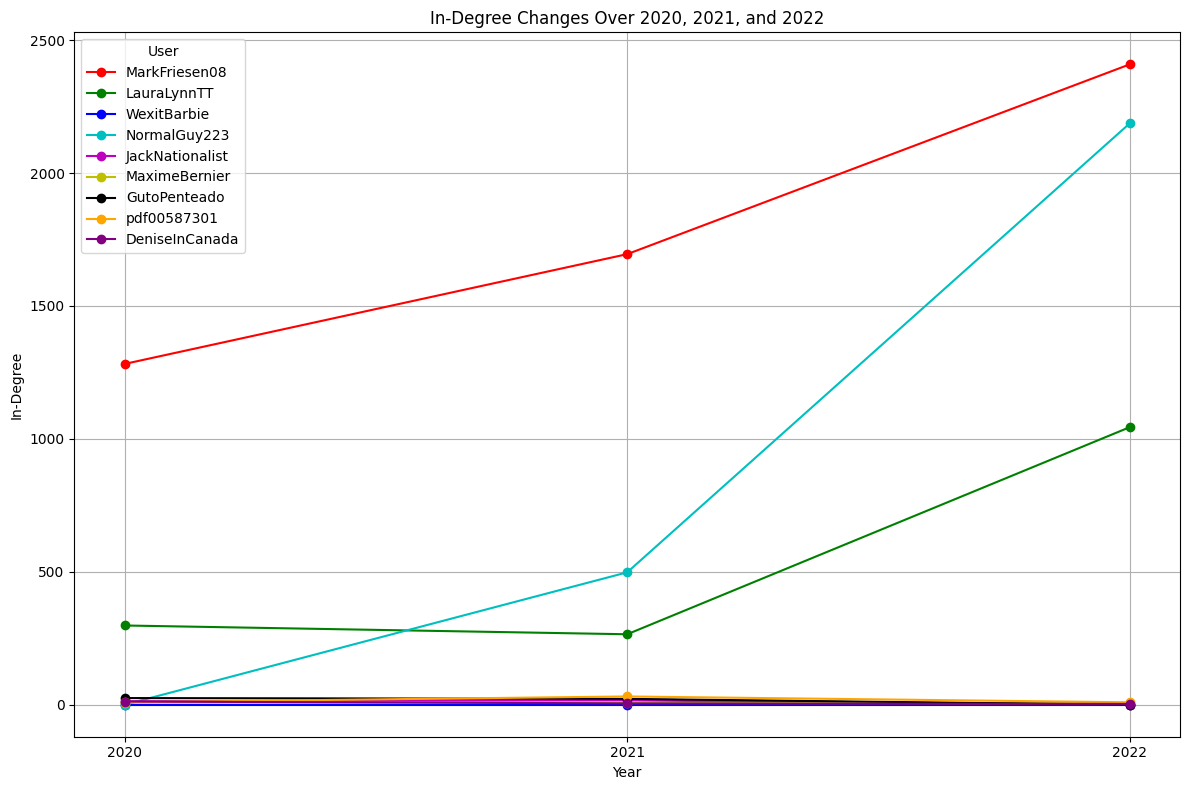

In [17]:



# Highlighted users list
highlighted_users = ["MarkFriesen08", "LauraLynnTT", "WexitBarbie", "NormalGuy223", "JackNationalist", "MaximeBernier", "GutoPenteado", "pdf00587301", "DeniseInCanada"]

# Map user names to user IDs (reverse of 'name_map' assuming it maps IDs to names)
user_id_map = {v: k for k, v in name_map.items()}

# Colors for each user for plotting
colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k', 'orange', 'purple']

# Initialize a dictionary to hold the in-degree for each user by year
in_degree_by_year = {user: [] for user in highlighted_users}

# Process each year's graph
for i in range(3):
    graph = all_graph[i]
    for user in highlighted_users:
        user_id = user_id_map.get(user, None)
        if user_id and user_id in graph:
            in_degree_by_year[user].append(graph.in_degree(user_id))
        else:
            # Append 0 if the user is not found in the graph for that year
            in_degree_by_year[user].append(0)

# Plotting
years = [2020, 2021, 2022]
plt.figure(figsize=(12, 8))

for idx, user in enumerate(highlighted_users):
    plt.plot(years, in_degree_by_year[user], marker='o', color=colors[idx], label=user)

plt.title("In-Degree Changes Over 2020, 2021, and 2022")
plt.xlabel("Year")
plt.ylabel("In-Degree")
plt.xticks(years)
plt.legend(title="User")
plt.grid(True)
plt.tight_layout()
plt.show()


**JACCARD SIMILARITY BETWEEN RETWEETERS OF POTENTIAL ACCOUNTS**

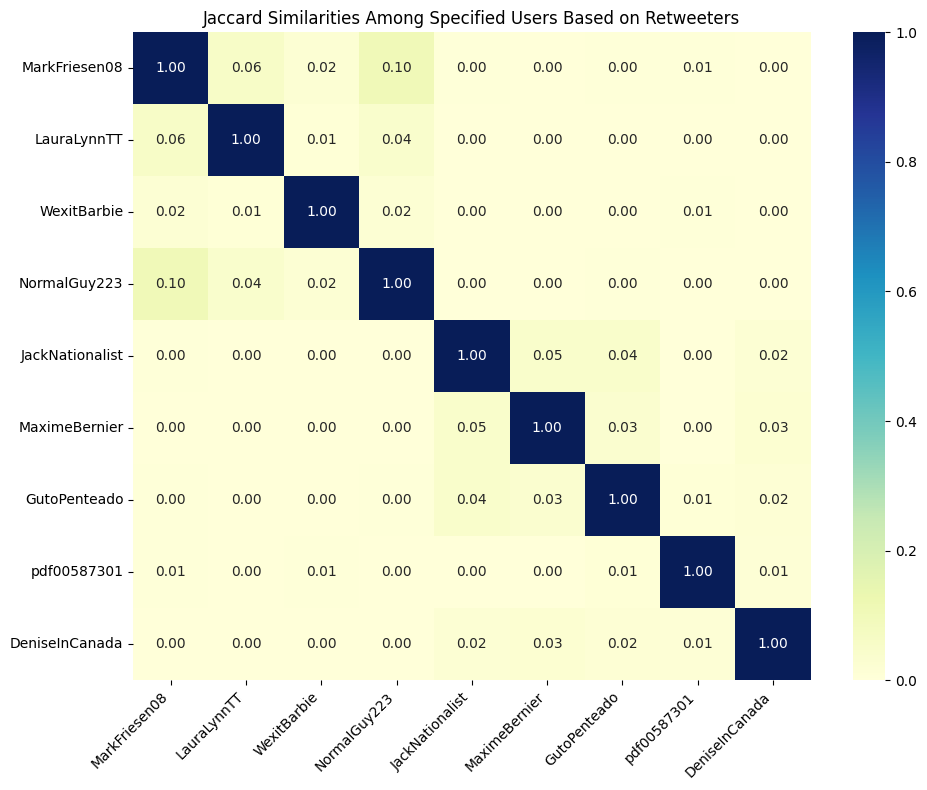

In [18]:


# Specified users
specified_users = ["MarkFriesen08", "LauraLynnTT", "WexitBarbie", "NormalGuy223",
                   "JackNationalist", "MaximeBernier", "GutoPenteado", "pdf00587301", "DeniseInCanada"]

# Reverse the name_map to lookup by screen_name
screen_name_to_id = {v.lower(): k for k, v in name_map.items()}

# Initialize a dictionary to hold the set of retweeters for each specified user
user_retweeters = {user: set() for user in specified_users}

# Collect retweeters for each specified user across all graphs
for graph in all_graph:
    for user in specified_users:
        user_id = screen_name_to_id.get(user.lower())
        if user_id and graph.has_node(user_id):
            # Use .predecessors() to get the users who retweeted the specified user's tweets
            user_retweeters[user].update(graph.predecessors(user_id))

# Calculate Jaccard similarities
jaccard_similarities = np.zeros((len(specified_users), len(specified_users)))

for i, user1 in enumerate(specified_users):
    for j, user2 in enumerate(specified_users):
        if i == j:
            # The similarity between the same users should be 1
            jaccard_similarities[i, j] = 1.0
        else:
            intersection = len(user_retweeters[user1].intersection(user_retweeters[user2]))
            union = len(user_retweeters[user1].union(user_retweeters[user2]))
            jaccard_similarities[i, j] = intersection / union if union else 0

# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(jaccard_similarities, annot=True, fmt=".2f", cmap="YlGnBu", xticklabels=specified_users, yticklabels=specified_users)
plt.title('Jaccard Similarities Among Specified Users Based on Retweeters')
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

Users MarkFriesen08 and LauraLynnTT have a Jaccard similarity of 0.06 based on retweeters.
Overlapping retweeters: xena_lucky, SZenek13, corra_carlo, kensteady79, davidbi54290507, Ronv3V, MarlenaAlarie, carter94017784, GriffinJesdes, SadChinadian, BeaBettyK, RobertMalott5, CaligirlLeftie, 2oceanscb, ct22332044, MaryMenopausal, baddestgoy74, Eren30620277, baberhamcanada, DavidPretty5, RayRayRednWhite, Christycracker1, SharonB23439661, nodshadley, donaldarsenau61, PJLPatriot, brod_sp, chef_shar, EvChiasson, RussellWoitowi1, IAmPat61204643, DonnaReiter5, redrebel86, theWesternPIE, ExposeGrove, FlorianJanina, Karen88775, notyetsonic0, WooWooDiva, goodeb, IYQYQR, RandyBoon3, MarjoriePaulso8, teresa_cronin, Strong123K, fredericksview, henryraymondbr1, TammyNiemi, BeverlyTymchuk, Duck_hk, LinnieRants, Sotacor, ErikLuczak, Allie24300928, darleneclarke5, Kirky861, joannem58, RonB369, BonnieB2B, NoEasyBrushOff, Len_Palajac, ednshar, VoiceofSanity9, MarioM007, MargoKowalczyk, BrownSugarFudge, kri

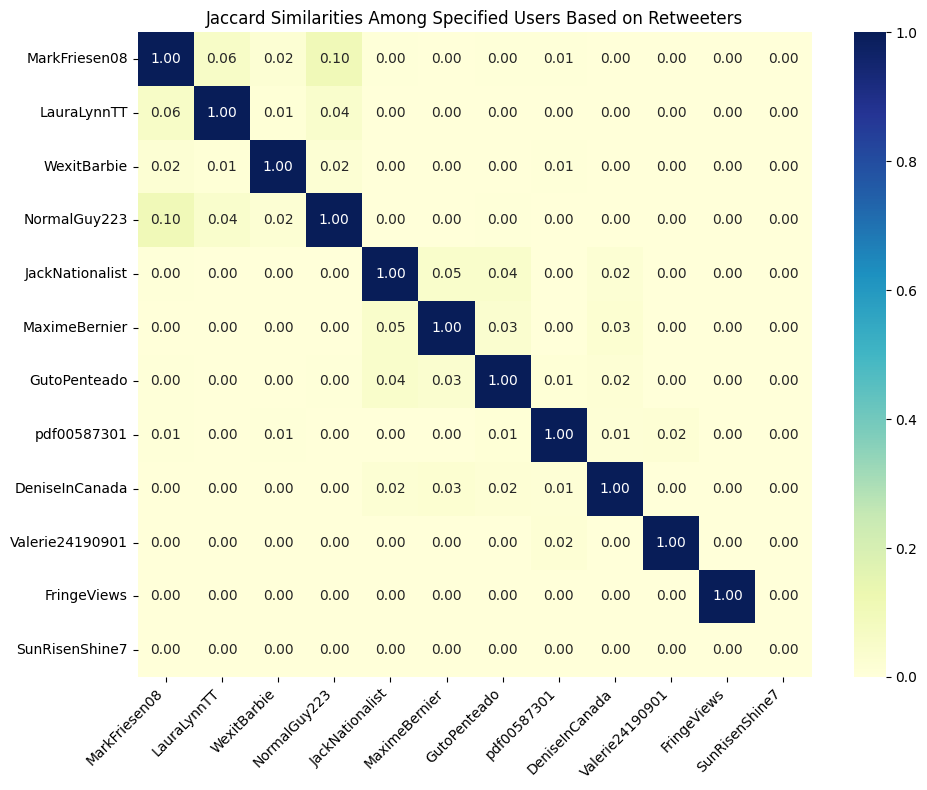

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx

# Specified users
specified_users = ["MarkFriesen08", "LauraLynnTT", "WexitBarbie", "NormalGuy223",
                   "JackNationalist", "MaximeBernier", "GutoPenteado", "pdf00587301", "DeniseInCanada", "Valerie24190901", "FringeViews","SunRisenShine7"]

# Reverse the name_map to lookup by screen_name
screen_name_to_id = {v.lower(): k for k, v in name_map.items()}

# Initialize a dictionary to hold the set of retweeters for each specified user
user_retweeters = {user: set() for user in specified_users}

# Collect retweeters for each specified user across all graphs
for graph in all_graph:
    for user in specified_users:
        user_id = screen_name_to_id.get(user.lower())
        if user_id and graph.has_node(user_id):
            # Use .predecessors() to get the users who retweeted the specified user's tweets
            user_retweeters[user].update(graph.predecessors(user_id))

# Calculate Jaccard similarities
jaccard_similarities = np.zeros((len(specified_users), len(specified_users)))

for i, user1 in enumerate(specified_users):
    for j, user2 in enumerate(specified_users):
        intersection = user_retweeters[user1].intersection(user_retweeters[user2])
        union = user_retweeters[user1].union(user_retweeters[user2])
        jaccard_similarity = len(intersection) / len(union) if union else 0
        jaccard_similarities[i, j] = jaccard_similarity

        # Check if Jaccard similarity is above 0.05 and not comparing the user with themselves
        if jaccard_similarity > 0.05 and i != j:
            print(f"Users {user1} and {user2} have a Jaccard similarity of {jaccard_similarity:.2f} based on retweeters.")
            overlapping_retweeters_names = [name_map.get(retweeter_id, "Unknown") for retweeter_id in intersection]
            print(f"Overlapping retweeters: {', '.join(overlapping_retweeters_names)}\n")

# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(jaccard_similarities, annot=True, fmt=".2f", cmap="YlGnBu", xticklabels=specified_users, yticklabels=specified_users)
plt.title('Jaccard Similarities Among Specified Users Based on Retweeters')
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


In [20]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx

# Specified users
specified_users = ["MarkFriesen08", "LauraLynnTT", "WexitBarbie", "NormalGuy223",
                   "JackNationalist", "MaximeBernier", "GutoPenteado", "pdf00587301", "DeniseInCanada"]

# Reverse the name_map to lookup by screen_name
screen_name_to_id = {v.lower(): k for k, v in name_map.items()}

# Initialize a dictionary to hold the set of users retweeted by each specified user
users_retweeted_by_specified = {user: {} for user in specified_users}

# Collect the users retweeted by each specified user across all graphs
for graph in all_graph:
    for user in specified_users:
        user_id = screen_name_to_id.get(user.lower())
        if user_id and graph.has_node(user_id):
            # For each user that the specified user retweeted, increment the count
            for retweeted_user_id in graph.successors(user_id):
                if retweeted_user_id in users_retweeted_by_specified[user]:
                    users_retweeted_by_specified[user][retweeted_user_id] += 1
                else:
                    users_retweeted_by_specified[user][retweeted_user_id] = 1

# Print the users retweeted by each specified user and how many times they were retweeted
for user, retweeted_users_counts in users_retweeted_by_specified.items():
    print(f"{user} retweeted the following users:")
    for retweeted_user_id, count in retweeted_users_counts.items():
        retweeted_user_name = name_map.get(retweeted_user_id, "Unknown")
        print(f" - {retweeted_user_name} was retweeted {count} times")
    print("\n")  # Add a newline for better readability between users


MarkFriesen08 retweeted the following users:
 - TomTSEC was retweeted 1 times
 - MaximeBernier was retweeted 3 times
 - ClimateRealists was retweeted 1 times
 - joe_warmington was retweeted 1 times
 - ezralevant was retweeted 1 times
 - Brokeassgarage1 was retweeted 1 times
 - PPC_pierrefonds was retweeted 1 times
 - CanadasPatriots was retweeted 1 times
 - AuthorRunciman was retweeted 1 times
 - MoniqueQuintal was retweeted 1 times
 - SalmanSima was retweeted 1 times
 - randyhillier was retweeted 2 times
 - MarkFriesen08 was retweeted 3 times
 - JackNationalist was retweeted 2 times
 - MatteaMerta was retweeted 1 times
 - MarjoriePaulso8 was retweeted 1 times
 - breezing_in was retweeted 1 times
 - CyaraBird was retweeted 1 times
 - PaulMitchell_AB was retweeted 2 times
 - RebelNewsOnline was retweeted 1 times
 - GutoPenteado was retweeted 2 times
 - terrybali was retweeted 1 times
 - richellegorst was retweeted 1 times
 - DeniseInCanada was retweeted 1 times
 - Ravenrider2020 was ret

In [21]:
import matplotlib.pyplot as plt
import networkx as nx



# Specified users and initializing a dictionary to hold retweeters count per year
specified_users = ["MarkFriesen08", "LauraLynnTT", "WexitBarbie", "NormalGuy223",
                   "JackNationalist", "MaximeBernier", "GutoPenteado", "pdf00587301", "DeniseInCanada"]
user_retweeters_yearly = {user: [0, 0, 0] for user in specified_users}  # For three years

# Collect retweeters for each specified user across all graphs for each year
for i, graph in enumerate(all_graph):
    for user in specified_users:
        user_id = screen_name_to_id.get(user.lower())
        if user_id and graph.has_node(user_id):
            # Count unique retweeters for the user in each year
            user_retweeters_yearly[user][i] += len(set(graph.predecessors(user_id)))

# Print the number of users that retweeted each specified user per year
for user, counts in user_retweeters_yearly.items():
    print(f"{user}:")
    for i, count in enumerate(counts):
        print(f"  Year {i+1}: {count} retweeters")



MarkFriesen08:
  Year 1: 1282 retweeters
  Year 2: 1695 retweeters
  Year 3: 2409 retweeters
LauraLynnTT:
  Year 1: 298 retweeters
  Year 2: 265 retweeters
  Year 3: 1044 retweeters
WexitBarbie:
  Year 1: 125 retweeters
  Year 2: 124 retweeters
  Year 3: 242 retweeters
NormalGuy223:
  Year 1: 0 retweeters
  Year 2: 498 retweeters
  Year 3: 2187 retweeters
JackNationalist:
  Year 1: 13 retweeters
  Year 2: 16 retweeters
  Year 3: 0 retweeters
MaximeBernier:
  Year 1: 8 retweeters
  Year 2: 7 retweeters
  Year 3: 5 retweeters
GutoPenteado:
  Year 1: 25 retweeters
  Year 2: 22 retweeters
  Year 3: 0 retweeters
pdf00587301:
  Year 1: 9 retweeters
  Year 2: 31 retweeters
  Year 3: 9 retweeters
DeniseInCanada:
  Year 1: 12 retweeters
  Year 2: 5 retweeters
  Year 3: 3 retweeters


**CLOSENESS CENTRALITY**

In [22]:
# Initialize a list to store top accounts sets for each year
top_accounts_sets = []

# Loop through each year's data
for i in range(3):
    # Calculate closeness centrality for the graph
    closeness_centrality = nx.closeness_centrality(all_graph[i])

    # Identify the top N accounts with the highest closeness centrality
    top_accounts = sorted(closeness_centrality, key=closeness_centrality.get, reverse=True)[:20]

    print(f"\nThe top {20} most central Twitter accounts (based on Closeness Centrality) in {2020+i}:")
    for account in top_accounts:
        user_name = name_map.get(account, "Unknown")
        centrality_value = closeness_centrality[account]
        highlight_users = ["MarkFriesen08", "LauraLynnTT", "WexitBarbie", "NormalGuy223", "JackNationalist", "MaximeBernier", "GutoPenteado", "pdf00587301", "DeniseInCanada"]
        # Check if the user is in the list of highlighted users
        if user_name in highlight_users:
            print(f"\033[91m{user_name} ({account}): Closeness Centrality = {centrality_value:.4f}\033[0m")  # Highlight in red
        else:
            print(f"{user_name} ({account}): Closeness Centrality = {centrality_value:.4f}")



The top 20 most central Twitter accounts (based on Closeness Centrality) in 2020:
MarkFriesen08 (950558867099824128): Closeness Centrality = 0.3974
JackNationalist (1103451206616150017): Closeness Centrality = 0.2654
GutoPenteado (67433637): Closeness Centrality = 0.2534
MaximeBernier (2791988124): Closeness Centrality = 0.2363
Brokeassgarage1 (59597004): Closeness Centrality = 0.2357
breezing_in (370978384): Closeness Centrality = 0.2355
TomTSEC (2525149488): Closeness Centrality = 0.2354
ClimateRealists (26036200): Closeness Centrality = 0.2354
joe_warmington (168470806): Closeness Centrality = 0.2354
ezralevant (20878297): Closeness Centrality = 0.2354
PPC_pierrefonds (1061090526215225344): Closeness Centrality = 0.2354
CanadasPatriots (1147528499282022402): Closeness Centrality = 0.2354
MoniqueQuintal (1033437590278553600): Closeness Centrality = 0.2354
SalmanSima (620393146): Closeness Centrality = 0.2354
randyhillier (23540244): Closeness Centrality = 0.2354
MatteaMerta (1000060

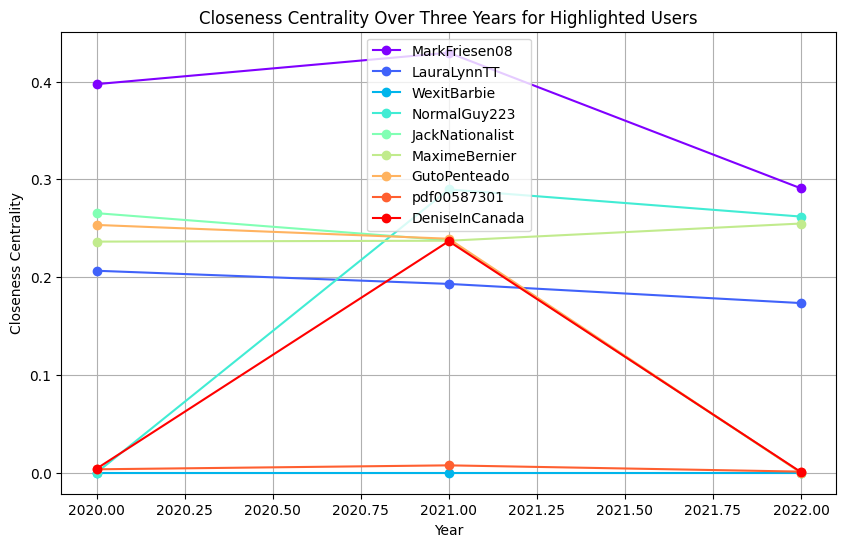

In [23]:

# Initialize a dictionary to store centrality values for highlighted users for each year
highlighted_centrality = {user: [] for user in highlight_users}

# Loop through each year's data
for i in range(3):
    # Calculate closeness centrality for the graph
    closeness_centrality = nx.closeness_centrality(all_graph[i])

    # Store centrality values for highlighted users
    for user in highlight_users:
        # Find the account id corresponding to the user name
        account_id = {v: k for k, v in name_map.items()}.get(user, None)
        if account_id and account_id in closeness_centrality:
            highlighted_centrality[user].append(closeness_centrality[account_id])
        else:
            highlighted_centrality[user].append(0)  # Append 0 if user not found

# Plotting
plt.figure(figsize=(10, 6))
years = [2020 + i for i in range(3)]
colors = plt.cm.rainbow(np.linspace(0, 1, len(highlight_users)))

for user, color in zip(highlight_users, colors):
    plt.plot(years, highlighted_centrality[user], marker='o', color=color, label=user)

plt.xlabel('Year')
plt.ylabel('Closeness Centrality')
plt.title('Closeness Centrality Over Three Years for Highlighted Users')
plt.legend()
plt.grid(True)
plt.show()


**BETWEENESS CENTRALITY**

In [24]:
# Initialize a list to store top accounts sets for each year
top_accounts_sets = []

# Loop through each year's data
for i in range(3):
    # Calculate betweenness centrality for the graph
    betweenness_centrality = nx.betweenness_centrality(all_graph[i])

    # Identify the top N accounts with the highest betweenness centrality
    top_accounts = sorted(betweenness_centrality, key=betweenness_centrality.get, reverse=True)[:20]

    print(f"\nThe top {20} most central Twitter accounts (based on Betweenness Centrality) in {2020+i}:")
    for account in top_accounts:
        user_name = name_map.get(account, "Unknown")  # Default to "Unknown" if account not found in name_map
        centrality_value = betweenness_centrality[account]
        highlight_users = ["MarkFriesen08", "LauraLynnTT", "WexitBarbie", "NormalGuy223", "JackNationalist", "MaximeBernier", "GutoPenteado", "pdf00587301", "DeniseInCanada"]
        # Check if the user is in the list of highlighted users
        if user_name in highlight_users:
            print(f"\033[91m{user_name} ({account}): Betweenness Centrality = {centrality_value:.4f}\033[0m")  # Highlight in red
        else:
            print(f"{user_name} ({account}): Betweenness Centrality = {centrality_value:.4f}")



The top 20 most central Twitter accounts (based on Betweenness Centrality) in 2020:
MarkFriesen08 (950558867099824128): Betweenness Centrality = 0.0059
JackNationalist (1103451206616150017): Betweenness Centrality = 0.0018
LauraLynnTT (16573142): Betweenness Centrality = 0.0012
WEXITBarbie (719365655066095616): Betweenness Centrality = 0.0005
Dixie4Alberta (2802606283): Betweenness Centrality = 0.0004
breezing_in (370978384): Betweenness Centrality = 0.0004
AuthorRunciman (1203359283959803904): Betweenness Centrality = 0.0002
MarjoriePaulso8 (1264691518490566656): Betweenness Centrality = 0.0002
Valerie24190901 (2442725460): Betweenness Centrality = 0.0001
DeniseInCanada (4170889399): Betweenness Centrality = 0.0000
99freemind (826419253347745792): Betweenness Centrality = 0.0000
IsaacHayesPPC (1169054965072941059): Betweenness Centrality = 0.0000
BillTufts (79745758): Betweenness Centrality = 0.0000
pdf00587301 (1180105262025207808): Betweenness Centrality = 0.0000
ct22332044 (108392

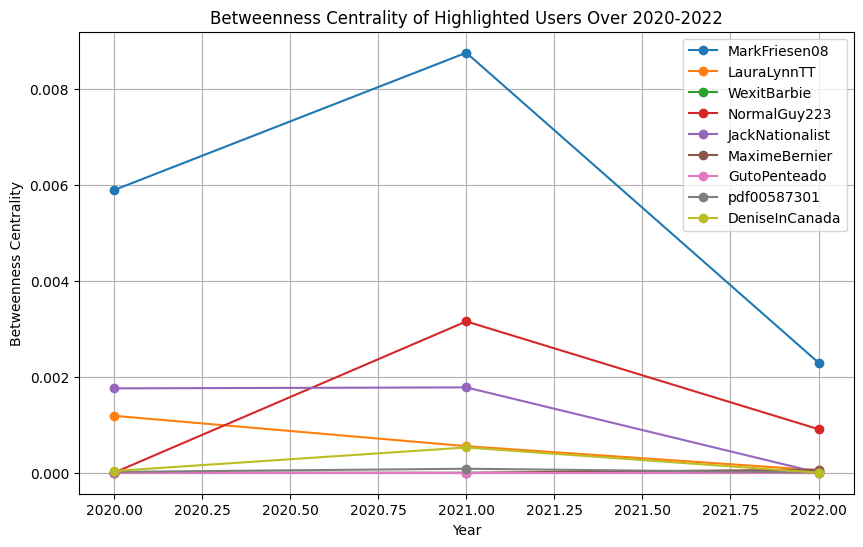

In [25]:
highlighted_users = ["MarkFriesen08", "LauraLynnTT", "WexitBarbie", "NormalGuy223", "JackNationalist", "MaximeBernier", "GutoPenteado", "pdf00587301", "DeniseInCanada"]

# Assuming 'all_graph' is a list of your graphs for 2020, 2021, 2022
# and 'name_map' is a dictionary mapping node IDs to usernames

# Prepare data for plotting
years = [2020, 2021, 2022]
# Highlighted users list and year setup remains the same
user_betweenness = {user: [] for user in highlighted_users}

for year, graph in zip(years, all_graph):
    betweenness_centrality = nx.betweenness_centrality(graph)
    for user in highlighted_users:
        user_id = next((id for id, name in name_map.items() if name == user), None)
        if user_id and user_id in betweenness_centrality:
            user_betweenness[user].append(betweenness_centrality[user_id])
        else:
            user_betweenness[user].append(0)

# Plotting
plt.figure(figsize=(10, 6))
for user, centralities in user_betweenness.items():
    plt.plot(years, centralities, marker='o', label=user)

plt.xlabel('Year')
plt.ylabel('Betweenness Centrality')
plt.title('Betweenness Centrality of Highlighted Users Over 2020-2022')
plt.legend()
plt.grid(True)
plt.show()

**EIGEN-VECTOR CENTRALITY**

In [26]:
# Initialize a list to store top accounts sets for each year
top_accounts_sets = []

# Loop through each year's data
for i in range(3):
    # Calculate eigenvector centrality for the graph
    eigenvector_centrality = nx.eigenvector_centrality(all_graph[i])

    # Identify the top N accounts with the highest eigenvector centrality
    top_accounts = sorted(eigenvector_centrality, key=eigenvector_centrality.get, reverse=True)[:20]

    print(f"\nThe top {10} most central Twitter accounts (based on Eigenvector Centrality) in {2020+i}:")
    for account in top_accounts:
        user_name = name_map.get(account, "Unknown")  # Default to "Unknown" if account not found in name_map
        centrality_value = eigenvector_centrality[account]
        highlight_users = ["MarkFriesen08", "LauraLynnTT", "WexitBarbie", "NormalGuy223", "JackNationalist", "MaximeBernier", "GutoPenteado", "pdf00587301", "DeniseInCanada"]
        # Check if the user is in the list of highlighted users
        if user_name in highlight_users:
            print(f"\033[91m{user_name} ({account}): Eigenvector Centrality = {centrality_value:.4f}\033[0m")  # Highlight in red
        else:
            print(f"{user_name} ({account}): Eigenvector Centrality = {centrality_value:.4f}")



The top 10 most central Twitter accounts (based on Eigenvector Centrality) in 2020:
MarkFriesen08 (950558867099824128): Eigenvector Centrality = 0.4632
GutoPenteado (67433637): Eigenvector Centrality = 0.2539
JackNationalist (1103451206616150017): Eigenvector Centrality = 0.2471
LauraLynnTT (16573142): Eigenvector Centrality = 0.2279
MaximeBernier (2791988124): Eigenvector Centrality = 0.1656
Brokeassgarage1 (59597004): Eigenvector Centrality = 0.1656
breezing_in (370978384): Eigenvector Centrality = 0.1656
AuthorRunciman (1203359283959803904): Eigenvector Centrality = 0.1656
TomTSEC (2525149488): Eigenvector Centrality = 0.1656
ClimateRealists (26036200): Eigenvector Centrality = 0.1656
joe_warmington (168470806): Eigenvector Centrality = 0.1656
ezralevant (20878297): Eigenvector Centrality = 0.1656
PPC_pierrefonds (1061090526215225344): Eigenvector Centrality = 0.1656
CanadasPatriots (1147528499282022402): Eigenvector Centrality = 0.1656
PaulMitchell_AB (1069697383829651456): Eigenv

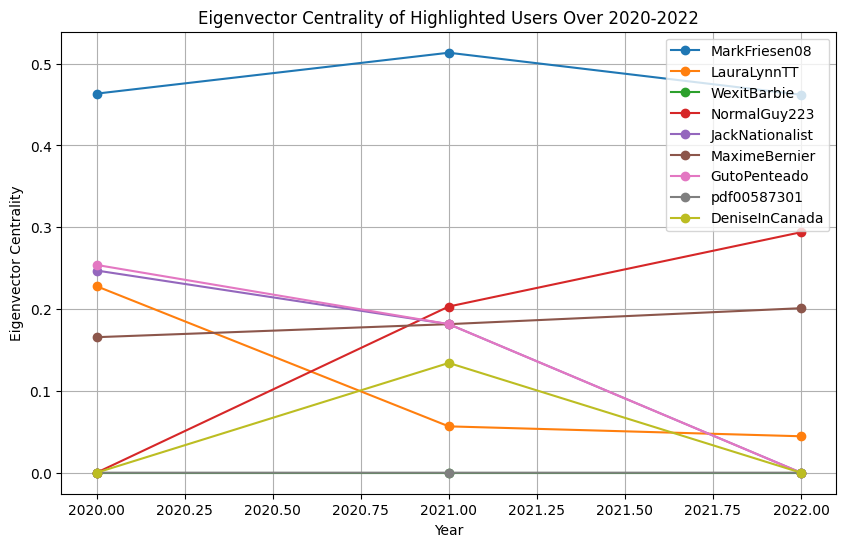

In [27]:
highlighted_users = ["MarkFriesen08", "LauraLynnTT", "WexitBarbie", "NormalGuy223", "JackNationalist", "MaximeBernier", "GutoPenteado", "pdf00587301", "DeniseInCanada"]

# Assuming 'all_graph' is a list of your graphs for 2020, 2021, 2022
# and 'name_map' is a dictionary mapping node IDs to usernames

# Prepare data for plotting
years = [2020, 2021, 2022]
user_centralities = {user: [] for user in highlighted_users}

for year, graph in zip(years, all_graph):
    eigenvector_centrality = nx.eigenvector_centrality(graph)
    for user in highlighted_users:
        # Find the user's ID in the name_map
        user_id = next((id for id, name in name_map.items() if name == user), None)
        # Append the centrality value if the user exists in this year's graph
        if user_id and user_id in eigenvector_centrality:
            user_centralities[user].append(eigenvector_centrality[user_id])
        else:
            user_centralities[user].append(0)  # Append 0 if user not found

# Plotting
plt.figure(figsize=(10, 6))
for user, centralities in user_centralities.items():
    plt.plot(years, centralities, marker='o', label=user)

plt.xlabel('Year')
plt.ylabel('Eigenvector Centrality')
plt.title('Eigenvector Centrality of Highlighted Users Over 2020-2022')
plt.legend()
plt.grid(True)
plt.show()


**COMMUNITY DETECTION**

In [28]:
pip install python-louvain

In [29]:
import community.community_louvain as community_louvain
random_seed = 42
random.seed(random_seed)  # Set seed for the random module
np.random.seed(random_seed)

for i in range(3):
    # Convert the directed graph to an undirected graph for Louvain algorithm
    undirected_graph = all_graph[i].to_undirected()

    # Apply the Louvain algorithm to detect the community structure in the undirected graph
    partition = community_louvain.best_partition(undirected_graph)

    # Invert the mapping to group nodes by their community
    communities = {}
    for node, comm_id in partition.items():
        communities.setdefault(comm_id, []).append(node)

    # Print or process communities with more than 40 nodes for each year
    print(f"\nCommunities for {2020 + i} with more than 40 nodes:")
    for comm_id, nodes in communities.items():
        if len(nodes) > 40:  # Check if the community has more than 40 nodes
            print(f"Community {comm_id + 1}: {len(nodes)} nodes")



Communities for 2020 with more than 40 nodes:
Community 1: 140 nodes
Community 2: 1020 nodes
Community 3: 287 nodes
Community 64: 67 nodes

Communities for 2021 with more than 40 nodes:
Community 1: 1323 nodes
Community 7: 66 nodes
Community 14: 282 nodes
Community 20: 469 nodes
Community 201: 49 nodes
Community 43: 123 nodes
Community 262: 85 nodes

Communities for 2022 with more than 40 nodes:
Community 1: 1903 nodes
Community 3: 1925 nodes
Community 9: 1040 nodes
Community 11: 290 nodes
Community 66: 43 nodes
Community 36: 63 nodes
Community 129: 55 nodes


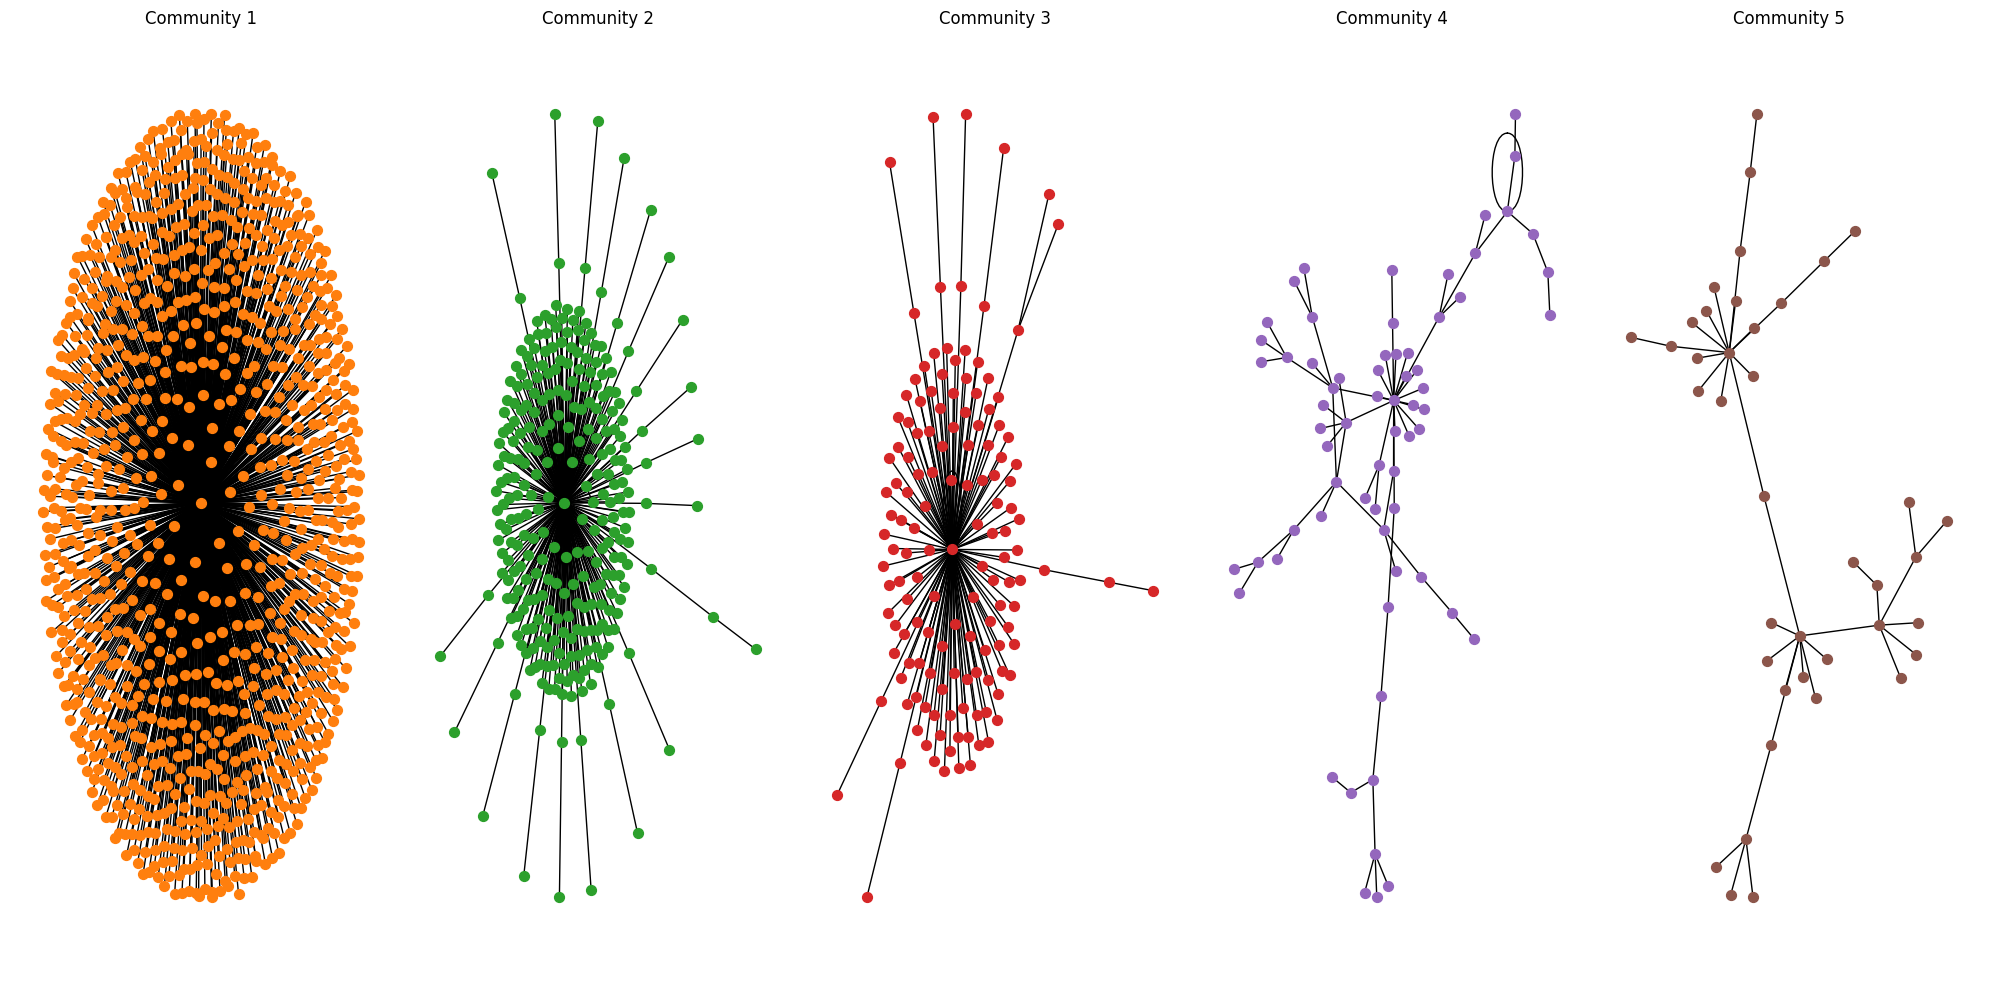


Top 10 accounts by in-degree in Community 1:
1. User: MarkFriesen08, In-Degree: 1021
2. User: IamCoryRansom, In-Degree: 2
3. User: spikefork, In-Degree: 2
4. User: canam1881, In-Degree: 1
5. User: RevJohnnyCue17, In-Degree: 1
6. User: jackaction, In-Degree: 1
7. User: Clfresh1, In-Degree: 1
8. User: FugEmAllButSix, In-Degree: 1
9. User: joelJoh29453569, In-Degree: 1
10. User: niagarasays, In-Degree: 1
11. User: xpristou, In-Degree: 1
12. User: Karen53723375, In-Degree: 1
13. User: 17truenorth45, In-Degree: 1
14. User: ATP542, In-Degree: 1
15. User: platinumreno1, In-Degree: 1
16. User: cheryl1492, In-Degree: 1
17. User: tuffdavi0291, In-Degree: 1
18. User: garden_nome1, In-Degree: 1
19. User: Jennyseyes, In-Degree: 1
20. User: StatManford, In-Degree: 1

Top 10 accounts by in-degree in Community 2:
1. User: LauraLynnTT, In-Degree: 266
2. User: DJE2612319, In-Degree: 2
3. User: Cosmobones, In-Degree: 2
4. User: Eren30620277, In-Degree: 2
5. User: DavidPretty5, In-Degree: 2
6. User: iPow

In [30]:
import matplotlib.pyplot as plt
import networkx as nx
import community.community_louvain as community_louvain
random_seed = 42
random.seed(random_seed)  # Set seed for the random module
np.random.seed(random_seed)


graph_2020 = all_graph[0].to_undirected()

partition = community_louvain.best_partition(graph_2020)

# Group nodes by their community
communities = {}
for node, comm_id in partition.items():
    communities.setdefault(comm_id, []).append(node)

# Ensure a consistent ordering by sorting communities first by size, then by the lowest node ID in each community
sorted_communities = sorted(communities.values(), key=lambda x: (-len(x), min(x)))

# Take the first five largest communities
largest_communities = sorted_communities[:5]

# Visualization
plt.figure(figsize=(20, 10))
for i, community in enumerate(largest_communities, start=1):
    subgraph = graph_2020.subgraph(community)
    pos = nx.spring_layout(subgraph)
    plt.subplot(1, 5, i)
    nx.draw(subgraph, pos, with_labels=False, node_size=50, node_color=f"C{i}")
    plt.title(f"Community {i}")

plt.tight_layout()
plt.show()

for i, community in enumerate(largest_communities, start=1):
    subgraph = graph_2020.subgraph(community)
    # Calculate in-degree for all nodes in the subgraph
    in_degrees = subgraph.degree()
    # Sort nodes in the community by their in-degree, in descending order, taking the top 10
    top_10_by_in_degree = sorted(in_degrees, key=lambda x: x[1], reverse=True)[:20]
    print(f"\nTop 10 accounts by in-degree in Community {i}:")
    for rank, (account, in_degree) in enumerate(top_10_by_in_degree, start=1):

        user_name = name_map.get(account, "Unknown")
        print(f"{rank}. User: {user_name}, In-Degree: {in_degree}")

# Print the total number of nodes in each of the first five largest communities
for i, community in enumerate(largest_communities, start=1):
    print(f"Total number of nodes in Community {i}: {len(community)}")

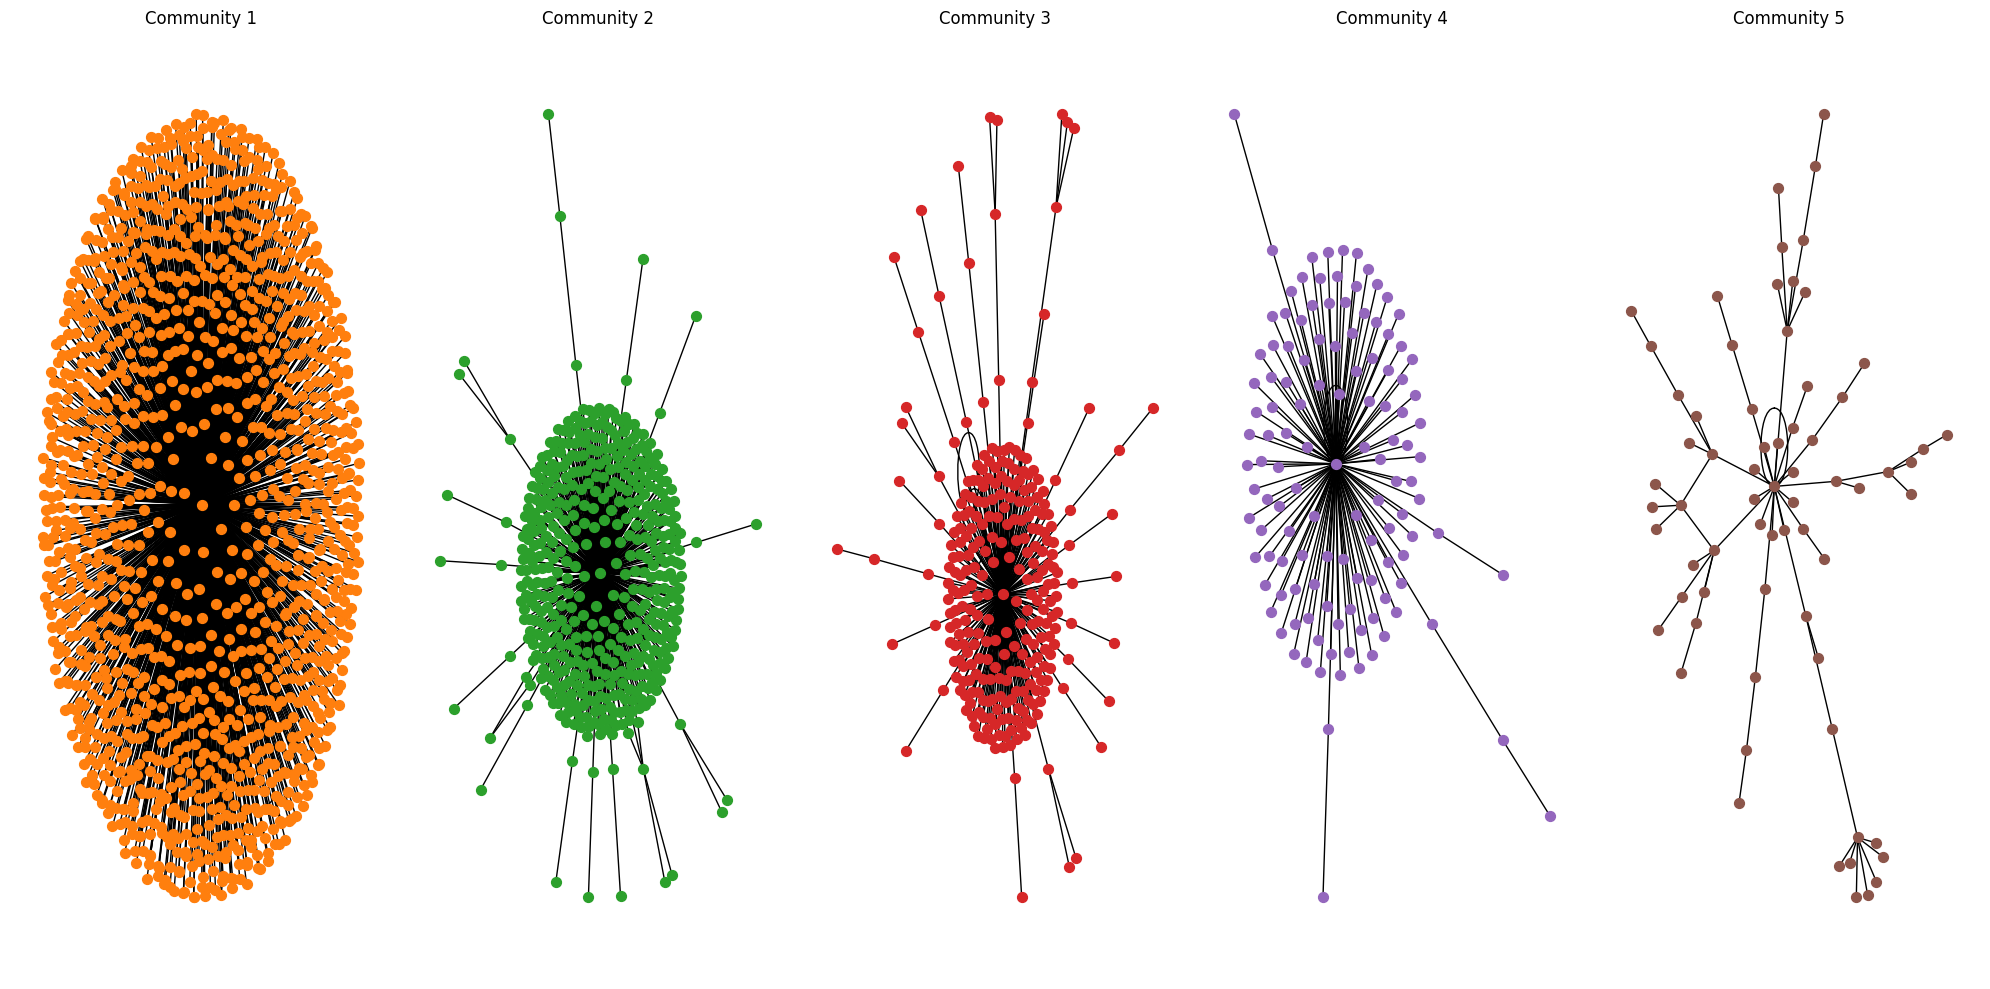


Top 10 accounts by in-degree in Community 1:
1. User: MarkFriesen08, In-Degree: 1324
2. User: EliseTRobby, In-Degree: 2
3. User: joseph66, In-Degree: 2
4. User: freedom_fanny, In-Degree: 2
5. User: PhoenixWolfJ, In-Degree: 2
6. User: thechapper, In-Degree: 2
7. User: chuck_zwicker, In-Degree: 2
8. User: SupremeOppress1, In-Degree: 2
9. User: Lindafortruth, In-Degree: 2
10. User: jellehpish, In-Degree: 2
11. User: gwwix, In-Degree: 2
12. User: Thelliana, In-Degree: 2
13. User: intrepid__45, In-Degree: 2
14. User: MaydayMatrix, In-Degree: 2
15. User: cynthiacusack, In-Degree: 2
16. User: JohnnyRoxstar, In-Degree: 2
17. User: helpcoincom, In-Degree: 2
18. User: eaglechrisgold, In-Degree: 2
19. User: longhornhp1, In-Degree: 2
20. User: Cosmic_Engineer, In-Degree: 2

Top 10 accounts by in-degree in Community 2:
1. User: NormalGuy223, In-Degree: 449
2. User: phil_rack, In-Degree: 5
3. User: ellenma98191725, In-Degree: 3
4. User: AilsaForshaw, In-Degree: 3
5. User: donahugh216, In-Degree: 2


In [31]:
import matplotlib.pyplot as plt
import networkx as nx
import community.community_louvain as community_louvain
import random
import numpy as np

random_seed = 42
random.seed(random_seed)  # Set seed for the random module
np.random.seed(random_seed)


graph_2021 = all_graph[1].to_undirected()  \

partition = community_louvain.best_partition(graph_2021)

# Group nodes by their community
communities = {}
for node, comm_id in partition.items():
    communities.setdefault(comm_id, []).append(node)

# Ensure a consistent ordering by sorting communities first by size, then by the lowest node ID in each community
sorted_communities = sorted(communities.values(), key=lambda x: (-len(x), min(x)))

# Take the first five largest communities
largest_communities = sorted_communities[:5]

# Visualization
plt.figure(figsize=(20, 10))
for i, community in enumerate(largest_communities, start=1):
    subgraph = graph_2021.subgraph(community)
    pos = nx.spring_layout(subgraph, seed=random_seed)  # Adding a seed for layout consistency
    plt.subplot(1, 5, i)
    nx.draw(subgraph, pos, with_labels=False, node_size=50, node_color=f"C{i}")
    plt.title(f"Community {i}")

plt.tight_layout()
plt.show()

# Print the top 10 accounts by in-degree in each of the five communities for 2021
for i, community in enumerate(largest_communities, start=1):
    subgraph = graph_2021.subgraph(community)
    in_degrees = subgraph.degree()  # Calculate in-degree for all nodes in the subgraph
    top_10_by_in_degree = sorted(in_degrees, key=lambda x: x[1], reverse=True)[:20]  # Sort nodes by their in-degree
    print(f"\nTop 10 accounts by in-degree in Community {i}:")
    for rank, (account, in_degree) in enumerate(top_10_by_in_degree, start=1):
        user_name = name_map.get(account, "Unknown")
        print(f"{rank}. User: {user_name}, In-Degree: {in_degree}")

# Print the total number of nodes in each of the first five largest communities for 2021
for i, community in enumerate(largest_communities, start=1):
    print(f"Total number of nodes in Community {i}: {len(community)}")



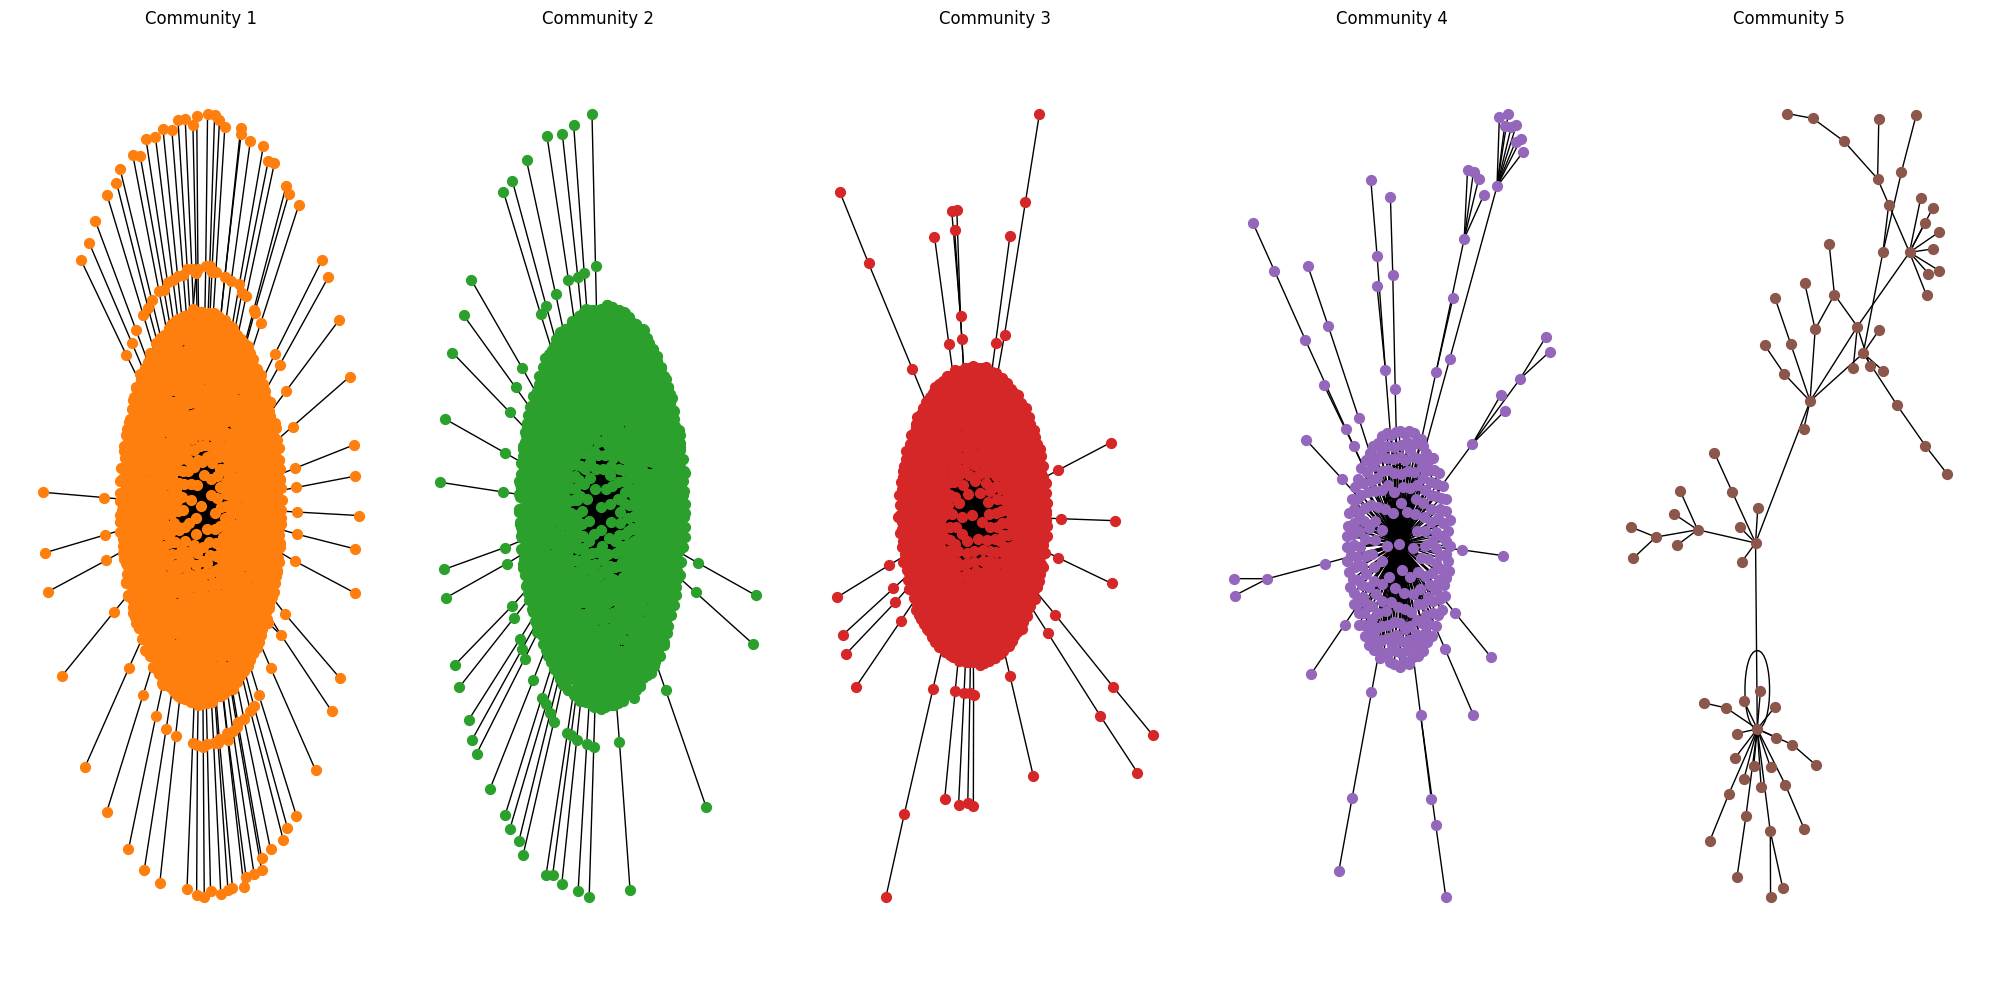


Top 10 accounts by in-degree in Community 1:
1. User: MarkFriesen08, In-Degree: 1859
2. User: rodrina, In-Degree: 3
3. User: Jaimecb2011, In-Degree: 3
4. User: kevinmklerks, In-Degree: 2
5. User: garden_nome1, In-Degree: 2
6. User: tranaplantedcdn, In-Degree: 2
7. User: lrntruth, In-Degree: 2
8. User: harold_henn, In-Degree: 2
9. User: dodi2208, In-Degree: 2
10. User: not_your_slave_, In-Degree: 2
11. User: 1972sammyt, In-Degree: 2
12. User: burnie68mac, In-Degree: 2
13. User: Shhhhhuush, In-Degree: 2
14. User: Chris63527998, In-Degree: 2
15. User: ShaunaM09940378, In-Degree: 2
16. User: Valerie24190901, In-Degree: 2
17. User: PaulTho47290238, In-Degree: 2
18. User: JennaForrestSm1, In-Degree: 2
19. User: BruceRi81726656, In-Degree: 2
20. User: barbraw28, In-Degree: 2

Top 10 accounts by in-degree in Community 2:
1. User: NormalGuy223, In-Degree: 1870
2. User: treefrogvenom, In-Degree: 3
3. User: wild_one1998, In-Degree: 2
4. User: hawkie1927, In-Degree: 2
5. User: frameofm1nd, In-Deg

In [32]:
import matplotlib.pyplot as plt
import networkx as nx
import community.community_louvain as community_louvain
import random
import numpy as np

random_seed = 42
random.seed(random_seed)  # Set seed for the random module
np.random.seed(random_seed)


graph_2022 = all_graph[2].to_undirected()

partition = community_louvain.best_partition(graph_2022)

# Group nodes by their community
communities = {}
for node, comm_id in partition.items():
    communities.setdefault(comm_id, []).append(node)

# Ensure a consistent ordering by sorting communities first by size, then by the lowest node ID in each community
sorted_communities = sorted(communities.values(), key=lambda x: (-len(x), min(x)))

# Take the first five largest communities
largest_communities = sorted_communities[:5]

# Visualization
plt.figure(figsize=(20, 10))
for i, community in enumerate(largest_communities, start=1):
    subgraph = graph_2022.subgraph(community)
    pos = nx.spring_layout(subgraph, seed=random_seed)
    plt.subplot(1, 5, i)
    nx.draw(subgraph, pos, with_labels=False, node_size=50, node_color=f"C{i}")
    plt.title(f"Community {i}")

plt.tight_layout()
plt.show()

# Print the top 10 accounts by in-degree in each of the five communities for 2022
for i, community in enumerate(largest_communities, start=1):
    subgraph = graph_2022.subgraph(community)
    in_degrees = subgraph.degree()  # Calculate in-degree for all nodes in the subgraph
    top_10_by_in_degree = sorted(in_degrees, key=lambda x: x[1], reverse=True)[:20]  # Sort nodes by their in-degree
    print(f"\nTop 10 accounts by in-degree in Community {i}:")
    for rank, (account, in_degree) in enumerate(top_10_by_in_degree, start=1):
        user_name = name_map.get(account, "Unknown")
        print(f"{rank}. User: {user_name}, In-Degree: {in_degree}")

# Print the total number of nodes in each of the first five largest communities for 2022
for i, community in enumerate(largest_communities, start=1):
    print(f"Total number of nodes in Community {i}: {len(community)}")


In [33]:
 #find the intersection for three years
common_accounts_set = set.intersection(*[set(community) for community in largest_communities])
print("Common accounts in the largest communities across 2020, 2021, and 2022:")
for account in common_accounts:
    user_name = name_map.get(account, "Unknown")
    print(f"- {user_name} (ID: {account})")



Common accounts in the largest communities across 2020, 2021, and 2022:
- Cagsy0021 (ID: 1225543694)
- DeniseInCanada (ID: 4170889399)
- pdf00587301 (ID: 1180105262025207808)
- MaximeBernier (ID: 2791988124)
- rdviger (ID: 758496474762088448)
- WEXITBarbie (ID: 719365655066095616)
- Valerie24190901 (ID: 2442725460)
- greg_scott84 (ID: 1042263277835677701)
- donaldarsenau61 (ID: 956305866961104896)
- moose_man4 (ID: 1317644011)
- FredFredderson1 (ID: 1183115084345815040)
- colin_korol (ID: 2245925911)
- WindchimeSerene (ID: 1232756300263522304)
- john_zealand (ID: 3107597132)
- MarkFriesen08 (ID: 950558867099824128)
- LauraLynnTT (ID: 16573142)
- leighgt (ID: 188489996)
- CalmTheFear (ID: 1266367911754559489)


In [34]:
import matplotlib.pyplot as plt
import networkx as nx
import community.community_louvain as community_louvain
import random
import numpy as np

random_seed = 42
random.seed(random_seed)  # Set seed for the random module
np.random.seed(random_seed)

specified_users = ["MarkFriesen08", "LauraLynnTT", "WexitBarbie", "NormalGuy223",
                   "JackNationalist", "MaximeBernier", "GutoPenteado", "pdf00587301", "DeniseInCanada"]

# Reverse the name_map to look up by screen_name if necessary
screen_name_to_id = {v: k for k, v in name_map.items()}

# Iterate over each year's graph
for year_index, graph in enumerate(all_graph):
    year = 2020 + year_index
    undirected_graph = graph.to_undirected()
    partition = community_louvain.best_partition(undirected_graph)

    # Group nodes by their community
    communities = {}
    for node, comm_id in partition.items():
        communities.setdefault(comm_id, []).append(node)

    print(f"\nYear {year}: Checking specified users in communities")

    # Check if specified users exist in any community and print details
    for user in specified_users:
        user_id = screen_name_to_id.get(user)
        if user_id:
            for comm_id, nodes in communities.items():
                if user_id in nodes:
                    total_nodes = len(nodes)

                    print(f"User '{user}' found in Community {comm_id}, Total Nodes: {total_nodes}")
                    break  # Assuming a user can only be in one community, we stop searching once found
            else:  # This else corresponds to the for-loop, executed if the loop completes
                print(f"User '{user}' not found in any community this year")



Year 2020: Checking specified users in communities
User 'MarkFriesen08' found in Community 1, Total Nodes: 1020
User 'LauraLynnTT' found in Community 2, Total Nodes: 287
User 'NormalGuy223' not found in any community this year
User 'JackNationalist' found in Community 51, Total Nodes: 32
User 'MaximeBernier' found in Community 54, Total Nodes: 9
User 'GutoPenteado' found in Community 34, Total Nodes: 25
User 'pdf00587301' found in Community 4, Total Nodes: 40
User 'DeniseInCanada' found in Community 4, Total Nodes: 40

Year 2021: Checking specified users in communities
User 'MarkFriesen08' found in Community 0, Total Nodes: 1323
User 'LauraLynnTT' found in Community 13, Total Nodes: 282
User 'NormalGuy223' found in Community 19, Total Nodes: 469
User 'JackNationalist' found in Community 261, Total Nodes: 85
User 'MaximeBernier' found in Community 261, Total Nodes: 85
User 'GutoPenteado' found in Community 6, Total Nodes: 66
User 'pdf00587301' found in Community 200, Total Nodes: 49
Us

**JACCARD SIMILARITY BETWEEN COMMUNITIES THAT HAS THE POTENTIAL USERS**

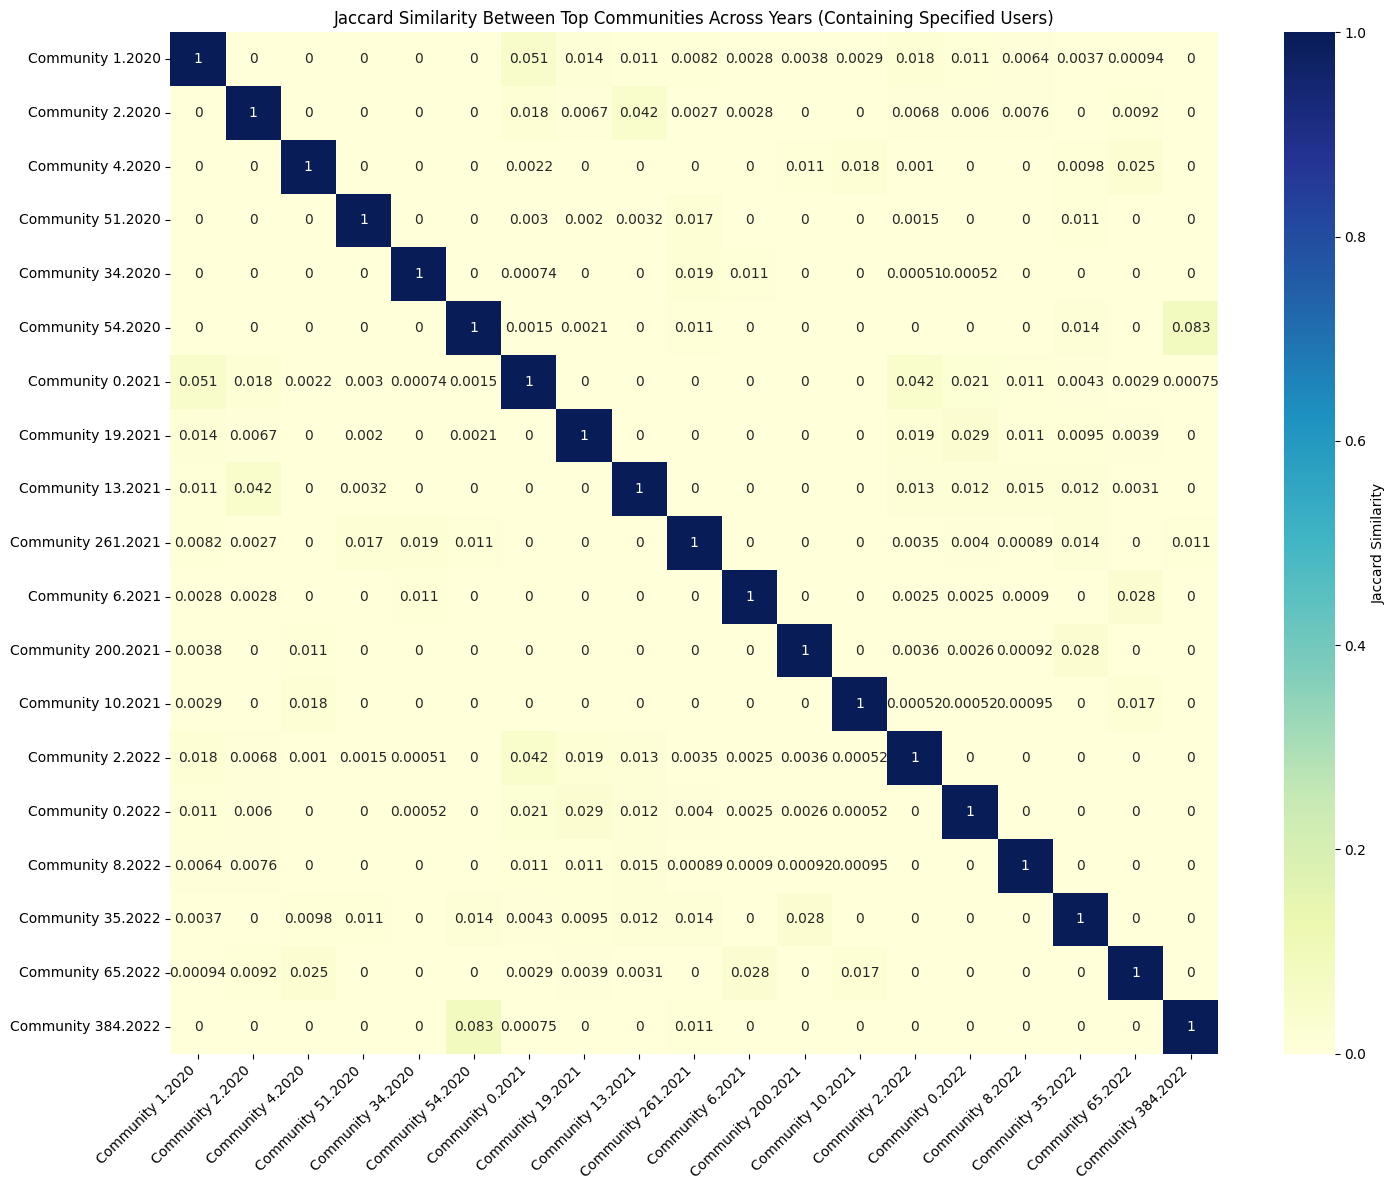

In [35]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import networkx as nx
import community.community_louvain as community_louvain
import random

random_seed = 42
random.seed(random_seed)
np.random.seed(random_seed)

years = [2020, 2021, 2022]
specified_users = ["MarkFriesen08", "LauraLynnTT", "WexitBarbie", "NormalGuy223", "JackNationalist", "MaximeBernier", "GutoPenteado", "pdf00587301", "DeniseInCanada"]
screen_name_to_id = {v: k for k, v in name_map.items()}

top_communities_per_year = {}


for year, graph in zip(years, all_graph):
    graph_undirected = graph.to_undirected()
    partition = community_louvain.best_partition(graph_undirected)

    communities = {}
    for node, comm_id in partition.items():
        communities.setdefault(comm_id, []).append(node)

    # Filter and keep communities containing at least one of the specified users, preserve original community IDs
    filtered_communities = {}
    for comm_id, nodes in communities.items():
        if any(screen_name_to_id.get(user, None) in nodes for user in specified_users):
            filtered_communities[comm_id] = nodes

    # Sort and select top 5 based on size, but maintain original comm IDs
    sorted_comms = sorted(filtered_communities.items(), key=lambda x: len(x[1]), reverse=True)[:10]
    top_communities_per_year[year] = {comm_id: nodes for comm_id, nodes in sorted_comms}

# Generate labels using original community IDs
labels = [f"Community {comm_id}.{year}" for year, comms in top_communities_per_year.items() for comm_id in comms.keys()]

# Initialize an empty similarity matrix for the filtered communities across all years
total_communities = len(labels)
detailed_similarity_matrix = np.zeros((total_communities, total_communities))

# Function to calculate Jaccard similarity
def jaccard_similarity(set1, set2):
    intersection = len(set(set1).intersection(set(set2)))
    union = len(set(set1).union(set(set2)))
    return intersection / union

# Calculate Jaccard similarities between communities
for i, (year1, comms1) in enumerate(top_communities_per_year.items()):
    for comm_id1, nodes1 in comms1.items():
        for j, (year2, comms2) in enumerate(top_communities_per_year.items()):
            for comm_id2, nodes2 in comms2.items():
                index1 = labels.index(f"Community {comm_id1}.{year1}")
                index2 = labels.index(f"Community {comm_id2}.{year2}")
                detailed_similarity_matrix[index1, index2] = jaccard_similarity(nodes1, nodes2)



plt.figure(figsize=(15, 12))

# When plotting the heatmap, directly use 'labels' for both axes

sns.heatmap(detailed_similarity_matrix, annot=True,
            xticklabels=labels, yticklabels=labels,
            cmap="YlGnBu", cbar_kws={'label': 'Jaccard Similarity'})

plt.title("Jaccard Similarity Between Top Communities Across Years (Containing Specified Users)")
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)

plt.tight_layout()
plt.show()






**CHECKING THE MEMBERS OF OVERLAPPING COMMUNITIES**

In [36]:
# List of specified users to highlight in red
specified_users = ["MarkFriesen08", "LauraLynnTT", "WexitBarbie", "NormalGuy223",
                   "JackNationalist", "MaximeBernier", "GutoPenteado", "pdf00587301", "DeniseInCanada"]

# Define a function to color specified user names in red
def colorize_name(name):
    if name in specified_users:
        return f"\033[91m{name}\033[0m"
    return name

# Define a threshold for considering significant Jaccard similarities
similarity_threshold = 0.03

# Iterate over the Jaccard similarity matrix to find significant similarities
for i, (year1, communities1) in enumerate(top_communities_per_year.items()):
    for comm_id1, nodes1 in communities1.items():
        index1 = labels.index(f"Community {comm_id1}.{year1}")

        for j, (year2, communities2) in enumerate(top_communities_per_year.items()):
            if year1 >= year2:
                continue

            for comm_id2, nodes2 in communities2.items():
                index2 = labels.index(f"Community {comm_id2}.{year2}")
                similarity = detailed_similarity_matrix[index1][index2]

                if similarity > similarity_threshold:
                    # Calculate common members
                    common_members_ids = set(nodes1).intersection(nodes2)
                    # Translate their IDs to names, apply red color to specified users
                    common_members_names = [colorize_name(name_map.get(member_id, "Unknown")) for member_id in common_members_ids]
                    total_overlapping_members = len(common_members_ids)

                    # Reporting
                    print(f"Communities {comm_id1} ({year1}) and {comm_id2} ({year2}) have a Jaccard similarity of {similarity:.2f}.")
                    print(f"Total overlapping members: {total_overlapping_members}")
                    if total_overlapping_members > 0:
                        # Join the member names for printing, with specified users colored red
                        overlapping_members_str = ', '.join(common_members_names)
                        print(f"Overlapping members: {overlapping_members_str}")
                    print("\n")


Communities 1 (2020) and 0 (2021) have a Jaccard similarity of 0.05.
Total overlapping members: 113
Overlapping members: FugEmAllButSix, BurlaGregoire, shadow_watcher_, BCarver85, 4futureHope, xlr8cad, lambe_johnny, letloverule4, jjgpden, No_Left_Here, MartinLogan1, UNHYPHENATEDCDN, jlcameron1960, stanulch, PaulMitchell_AB, JulieMacCallum2, JMCT212325, Darlene60818366, GarryAn31280857, LORRI_SK_FORT_Q, CanadianSence, 1goldzio, Rhonda50456703, Delta56ca, SimonaDeLorenz2, Danuta65Danuta, Scott87026300, rickcanada10, ontsunshine, Scott_Spidle, WilliamWanklyn, luztotal2, wongn, MaureenJanssens, hotroddergirl, SharonB23439661, IvanhansenIvan, jaysrule22, nodshadley, KayBee416, EMC2_Relativity, johnnynuckles, KockyRockie, RussellWoitowi1, sslovesrr, TruthMatters444, MGoretti1769, ghkodiak, MatthewTrump158, DaleAlton, for_options, MarieH62161805, Thee_Antitheist, mister_hunt, ussuricat1, VirtueSignalle6, HOORAH44851977, BegumChaCha, les_segal, quentinquark, 20rogue20, bobby_rose, Justin_H_4, 

**CLUSTERING AND TRANSITIVITY**

In [37]:
for i in range(3):
    avg_clustering_coefficient = nx.average_clustering(all_graph[i])
    transitivity = nx.transitivity(all_graph[i])

    print(f"For {2020 + i}:\n"
          f"The average clustering coefficient is {avg_clustering_coefficient} in the graph\n"
          f"The transitivity of the graph is {transitivity}\n")


For 2020:
The average clustering coefficient is 0.01047781046364614 in the graph
The transitivity of the graph is 0.05229142185663925

For 2021:
The average clustering coefficient is 0.03737696993082979 in the graph
The transitivity of the graph is 0.13555555555555557

For 2022:
The average clustering coefficient is 0.005855389682287589 in the graph
The transitivity of the graph is 0.03



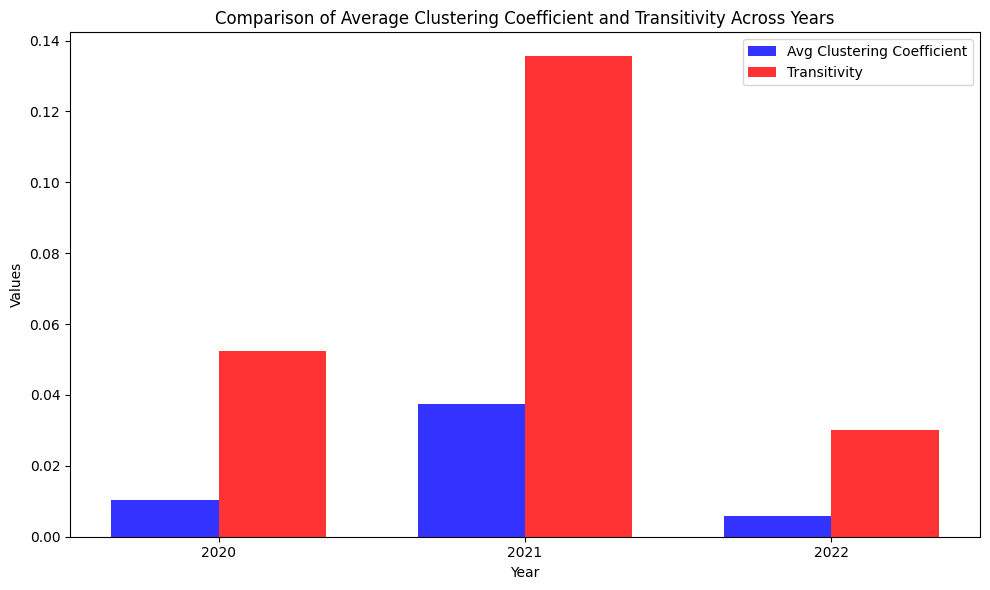

In [38]:
years = [2020, 2021, 2022]
avg_clustering_coefficients = []
transitivity_values = []

for i in range(3):
    avg_clustering_coefficient = nx.average_clustering(all_graph[i])
    transitivity = nx.transitivity(all_graph[i])

    avg_clustering_coefficients.append(avg_clustering_coefficient)
    transitivity_values.append(transitivity)

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

bar_width = 0.35
opacity = 0.8

rects1 = plt.bar(years, avg_clustering_coefficients, bar_width, alpha=opacity, color='b', label='Avg Clustering Coefficient')
rects2 = plt.bar([year + bar_width for year in years], transitivity_values, bar_width, alpha=opacity, color='r', label='Transitivity')

plt.xlabel('Year')
plt.ylabel('Values')
plt.title('Comparison of Average Clustering Coefficient and Transitivity Across Years')
plt.xticks([year + bar_width/2 for year in years], years)
plt.legend()

plt.tight_layout()
plt.show()